In [ ]:
import kagglehub
import numpy as np 
import pandas as pd
import os
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path
from random import choice
from IPython.display import Audio, display



In [7]:

# Download latest version
path = kagglehub.dataset_download("chrisfilo/urbansound8k")

df = pd.read_csv('/Users/eric/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1/UrbanSound8K.csv')

df.head()

print("Path to dataset files:", path)


Path to dataset files: /Users/eric/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1


/Users/eric/proj/ai-project/audioClassify/.venv/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


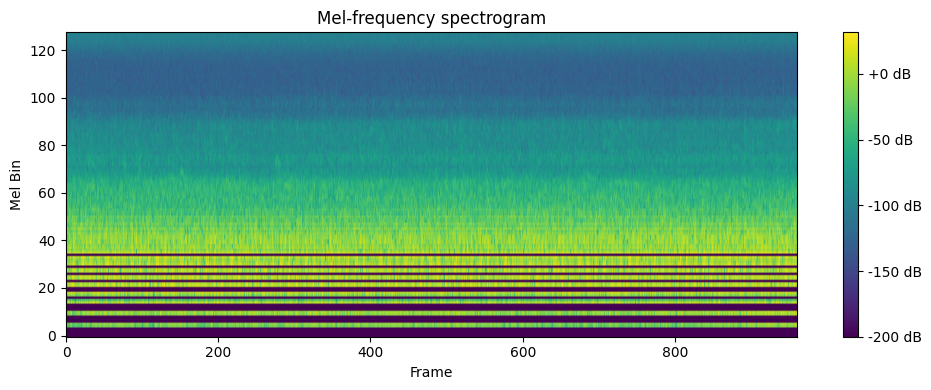

In [8]:

wp = list(Path(path).glob('**/*.wav'))
sound_file = choice(wp)
display(Audio(str(sound_file), autoplay=True))

# Load the audio file using torchaudio
waveform, sr = torchaudio.load(sound_file)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
spec = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_mels=128)(waveform)
spec_db_lr = torchaudio.transforms.AmplitudeToDB()(spec)
spec_db = np.sum(spec_db_lr.numpy(), axis=0)
plt.imshow(spec_db, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.xlabel('Frame')
plt.ylabel('Mel Bin')
plt.tight_layout()
plt.show()

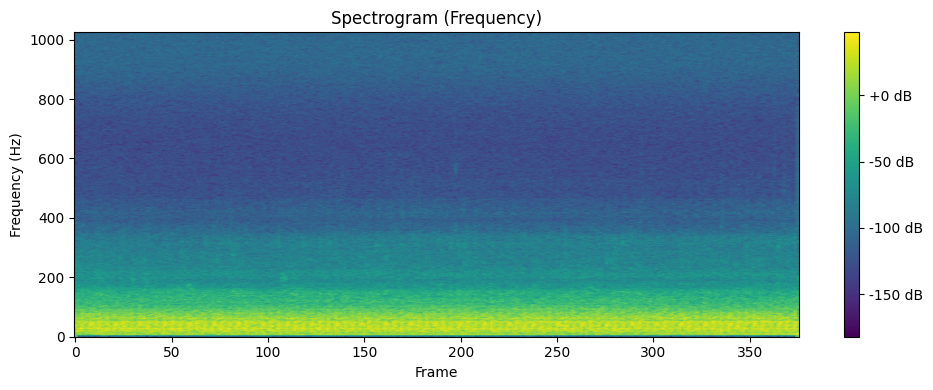

In [10]:
# Compute a standard spectrogram (not Mel) and plot with frequency on y-axis
spec = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512, power=2)(waveform)

spec_db_lr = torchaudio.transforms.AmplitudeToDB()(spec)
spec_db = np.sum(spec_db_lr.numpy(), axis=0)

plt.figure(figsize=(10, 4))
freqs = np.linspace(0, sr // 2, spec.shape[1])

spec_db = np.sum(spec_db_lr.numpy(), axis=0)
plt.imshow(spec_db, aspect='auto', origin='lower')


plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Frequency)')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

In [26]:
# Export spectrograms as image files


def write_spectrogram_image(sound_file: Path, output_dir: Path) -> None:
    # Load the audio file for this specific sound file
    waveform, sr = torchaudio.load(sound_file)
    
    base_filename = str(sound_file.stem)

    spec = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512, power=2)(waveform)

    spec_db_lr = torchaudio.transforms.AmplitudeToDB()(spec)
    spec_db = np.sum(spec_db_lr.numpy(), axis=0)

    # Create only ONE figure
    plt.figure(figsize=(10, 4))
    plt.imshow(spec_db, aspect='auto', origin='lower')

    # Remove axis labels, title, and colorbar for clean spectrogram
    plt.axis('off')
    freq_output_path = output_dir / f"{base_filename}_freq.png"
    plt.savefig(freq_output_path, dpi=150, bbox_inches='tight', pad_inches=0)
    plt.close()  # Important: close the figure to free memory


wp = list(Path(path).glob('**/*.wav'))
sound_file = choice(wp)

# Create output directory for spectrogram images
output_dir = Path("spectrogram_images")
output_dir.mkdir(exist_ok=True)


write_spectrogram_image(sound_file, output_dir)

In [32]:
from tqdm.auto import tqdm
from time import sleep 
from random import choices 

from itertools import islice


for sf in tqdm( choices(wp,k=10), desc="Processing sound files"):
    write_spectrogram_image(sf, output_dir)




Processing sound files:   0%|          | 0/10 [00:00<?, ?it/s]